In [ ]:
# This Program is geared to predict the closing stock price of a cooperation by using an artificial recuurent neural network called Long Short Term Memory.
# Through using the price from the last 60 days

In [12]:
#imports
import math
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [72]:
# get the data
df =  yf.download('AMZN', start = '2013-01-01', end='2023-07-31')
#show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100


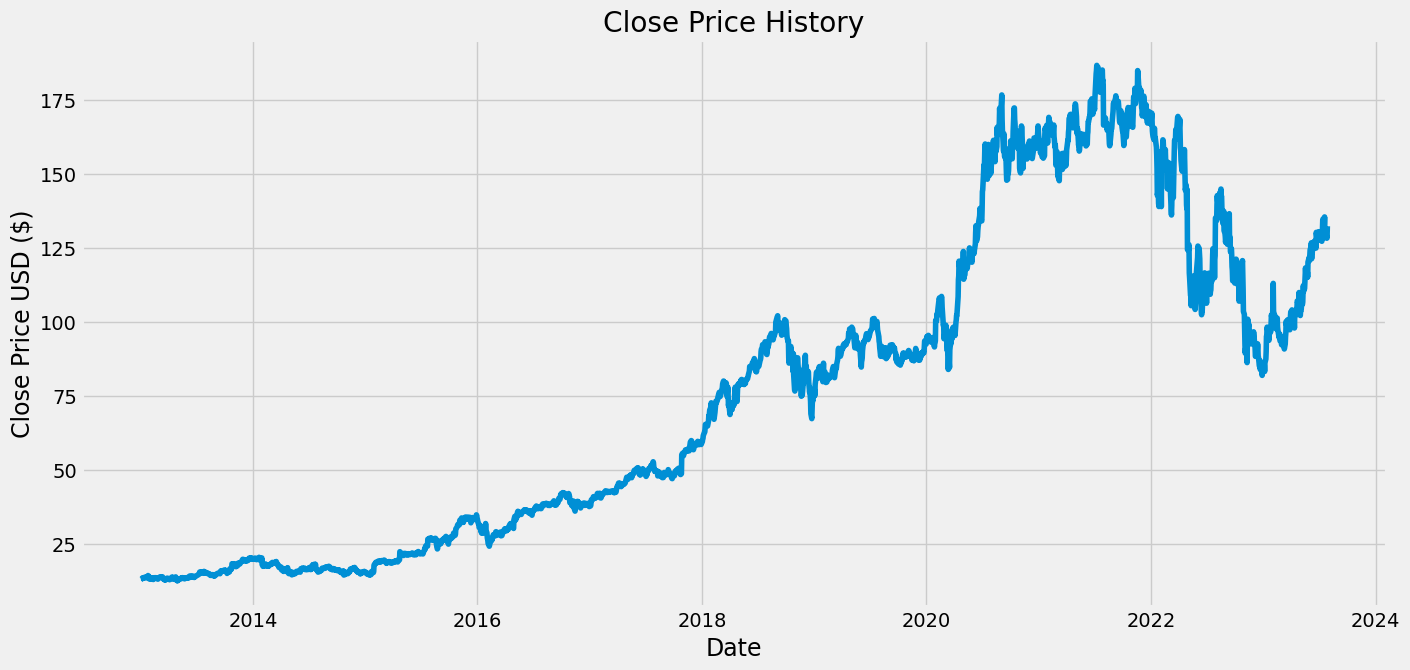

In [73]:
plt.figure(figsize = (15,7))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 17)
plt.ylabel('Close Price USD ($)', fontsize =17)
plt.show()

In [74]:
#create a dataframe with only the close column as you need it as a feature
data = df.filter(['Close'])


In [75]:
#convert the dataframe to a numpy array
dataset = data.values
# then get the number of rows to train the model
data_train_len =math.ceil(len(dataset) *.8)
data_train_len

2129

In [76]:
# you then need to scale the data into [0,1] to create a better model. This is good practice
scaler = MinMaxScaler(feature_range=(0,1))
# you then need to tranform the data
scaled = scaler.fit_transform(dataset)
scaled

array([[0.00260682],
       [0.00294271],
       [0.00313507],
       ...,
       [0.66455651],
       [0.66513073],
       [0.68786861]])

In [77]:
#Now that the data is scaled you need to split its x and y for tranining
train_data = scaled[0:data_train_len , : ] #calls the data set aside for tranining as scaled
#you then need to split it
x_train = []
y_train = []
 #load the scaled data as x and y
for i in range(60, len(train_data)):
 x_train.append(train_data[i-60:i,0]) #range of values from 0 to 59
 y_train.append(train_data[i,0])
 if i<= 61:
    print(x_train)
    print(y_train)
    print()




[array([0.00260682, 0.00294271, 0.00313507, 0.00580791, 0.00521076,
       0.00520214, 0.00491218, 0.00565862, 0.0070338 , 0.00679552,
       0.00594284, 0.00638784, 0.00685868, 0.00630458, 0.00570743,
       0.00724338, 0.01026648, 0.00798408, 0.00347958, 0.00704241,
       0.00495811, 0.00481457, 0.00337335, 0.00535717, 0.00401645,
       0.00344513, 0.00393893, 0.00257811, 0.00300588, 0.00609788,
       0.00603184, 0.00484041, 0.00617826, 0.00521937, 0.00508443,
       0.00493515, 0.00334177, 0.00319536, 0.00431215, 0.00460499,
       0.00502701, 0.0071429 , 0.00785489, 0.00733812, 0.00736396,
       0.00745296, 0.00660603, 0.00743573, 0.00771422, 0.00502701,
       0.00390161, 0.00277333, 0.00234843, 0.0025982 , 0.00148141,
       0.00273313, 0.00223646, 0.0034681 , 0.0049007 , 0.00524234])]
[0.003841315629562053]

[array([0.00260682, 0.00294271, 0.00313507, 0.00580791, 0.00521076,
       0.00520214, 0.00491218, 0.00565862, 0.0070338 , 0.00679552,
       0.00594284, 0.00638784, 0.0

In [78]:
#convert x_train & y_train to a numpy array as LSTM requires a 3D input
x_train= np.array(x_train)
y_train = np.array(y_train)
#reshape the input data into 3d
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2069, 60, 1)

In [79]:
#building the model using LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [80]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [81]:
#train and epochs is the number of iterations made through the neural network
model.fit(x_train , y_train , batch_size=1, epochs = 1)


2069/2069 [==============================] - 70s 32ms/step - loss: 0.0014


In [83]:
#create a testing dataset with a new array of our scaled data
data_test = scaled[data_train_len - 60: , :]
#create vars for testing
x_test = []
y_test = dataset[data_train_len] #contains our test values
for i in range (60,len(data_test)):
  x_test.append(data_test[i-60:i,0]) # loads scaled data into x for testing

In [84]:
#convert our x_test to a numpy array to make predictions
x_test = np.array(x_test)
#reshape it to become 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] , 1))


In [85]:
# now make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 [==============================] - 1s 26ms/step


In [86]:
#Evaluate the model by getting root mean squared
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

35.992591069156965

In [87]:
#evaluate with Mean absolute error
mae = np.mean(np.abs(predictions-y_test))
mae


37.64167689560051

In [ ]:
#meaning true the true value is 10 more giving 34

<ipython-input-88-3f4a09f01fbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


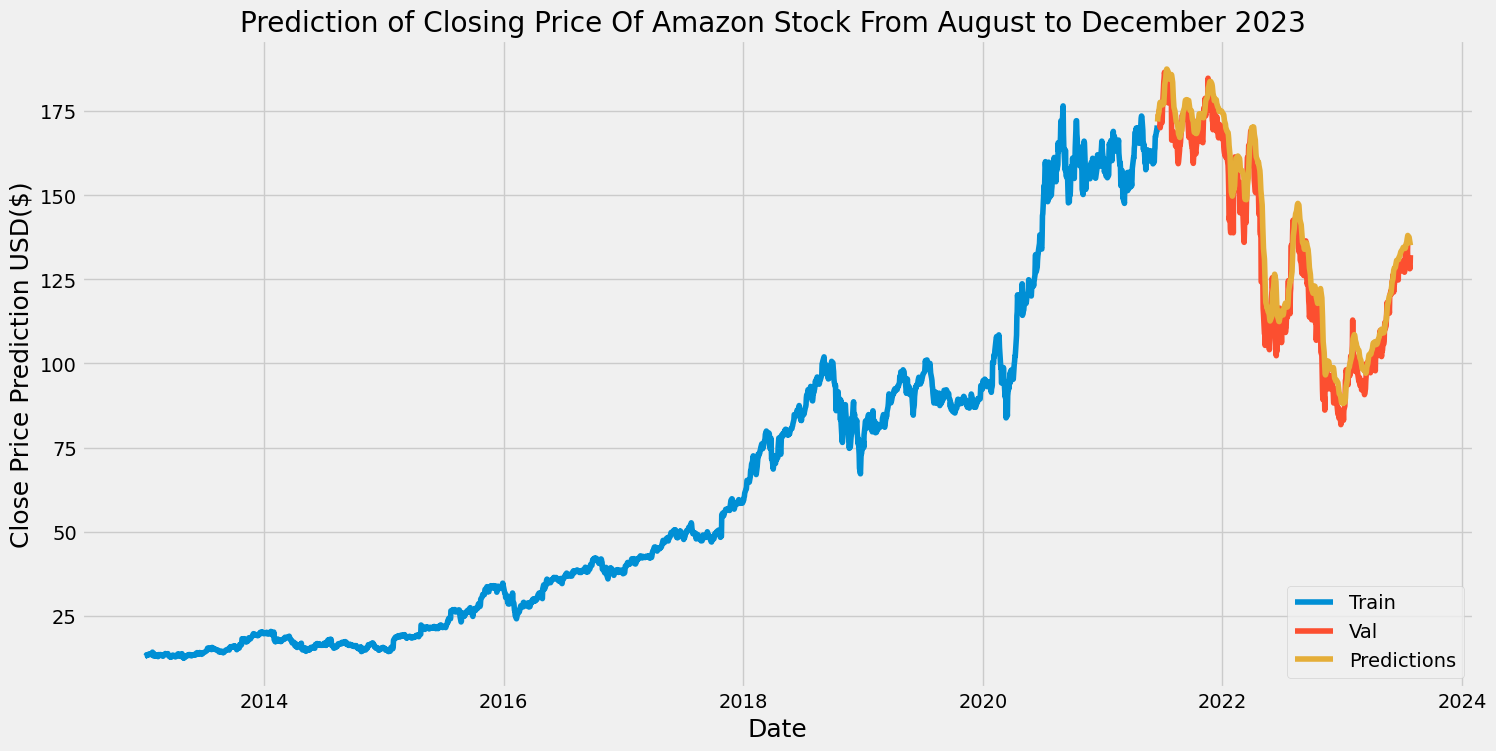

In [88]:
#plot your findings
train = data[:data_train_len]
valid = data[data_train_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize = (16,8))
plt.title('Prediction of Closing Price Of Amazon Stock From August to December 2023 ')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price Prediction USD($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val' , 'Predictions'], loc = 'lower right')
plt.show()

In [89]:
#show the valid & predicted price
valid

,Close,Predictions
Date,,
2021-06-17,174.462006,171.902206
2021-06-18,174.345001,173.332336
2021-06-21,172.697998,174.671738
2021-06-22,175.272003,175.576706
2021-06-23,175.190994,176.540009
...,...,...
2023-07-24,128.800003,137.561508
2023-07-25,129.130005,136.932632
2023-07-26,128.149994,136.333527
